# LIGHTHALL CHALLENGE 3

### *Context*

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### *Objective*

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### *Data Description*

The data contains the different data related to a food order. The detailed data dictionary is given below.

### *Data Dictionary*

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

# *Let us start by importing the required libraries and understading the structure of the data*

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

### Understanding the structure of the data

In [2]:
# Loading the data into python
foodhub_original = pd.read_csv(r"E:\fifa_cleaning\lighthall\challenge3\DASL1 - Level 3\foodhub-order.csv")

In [3]:
#Create a duplicate of the original file
foodhub = foodhub_original.copy()

In [6]:
# To know the names of the columns in the dataset
foodhub.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [7]:
#See the first few rows of the Dataset
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [8]:
#Get summary statistics of numerical columns
foodhub.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### **Question 1:** How many rows and columns are present in the data?

In [9]:
#Get the number of rows and columns
number_rows = foodhub.shape[0]
number_cols = foodhub.shape[1]

#Print the number of rows and columns
print("Number of rows:", number_rows)
print("Number of columns:", number_cols)

Number of rows: 1898
Number of columns: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [10]:
#Get information about the columns and data types
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [11]:
#Count the number of missing or null values in each column
foodhub.isnull().sum().rename_axis('Columns').reset_index(name='Null Values')

,Columns,Null Values
0,order_id,0
1,customer_id,0
2,restaurant_name,0
3,cuisine_type,0
4,cost_of_the_order,0
5,day_of_the_week,0
6,rating,0
7,food_preparation_time,0
8,delivery_time,0


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [12]:
# Check the minimum food_preparation_time
min_food_preparation_time = foodhub['food_preparation_time'].min()

# Check the maximum food_preparation_time
max_food_preparation_time = foodhub['food_preparation_time'].max()

# Calculate the average food_preparation_time
avg_food_preparation_time = foodhub['food_preparation_time'].mean()
rounded_avg_food_preparation_time = round(avg_food_preparation_time,2)


print("Minimum food preparation time:", min_food_preparation_time, "minutes")
print("Average food preparation time:", rounded_avg_food_preparation_time, "minutes")
print("Maximum food preparation time:", max_food_preparation_time, "minutes")

Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


### **Question 5:** How many orders are not rated? 

In [13]:
#Count how many orders are "not rated" in the rating column
number_not_rated = foodhub['rating'].value_counts()['Not given']

#Print the count
print("Number of Unrated Orders:", number_not_rated)

Number of Unrated Orders: 736


# Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

In [14]:
#Shows the that order_id is a unique identifier for each order.
order_id_counts = foodhub["order_id"].value_counts()
print(order_id_counts)

#Display the Order IDs as a table-which is more appropriate for unique identifiers
order_ids = foodhub["order_id"]
order_ids_table = pd.DataFrame(order_ids, columns=["order_id"])
print(order_ids_table)

1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64
      order_id
0      1477147
1      1477685
2      1477070
3      1477334
4      1478249
...        ...
1893   1476701
1894   1477421
1895   1477819
1896   1477513
1897   1478056

[1898 rows x 1 columns]


In [15]:
#Check for duplicate rows 
len(foodhub["order_id"]), len(foodhub["order_id"].unique())

(1898, 1898)

### **Observation**
#### The order_ID column doesn't have a duplicate value as the number of rows in the dataset is the same with the number of unique values in the column. This is a characteristic of a primary column or primary key.

#### Customer ID

In [16]:
# To find the top 10 customers
foodhub["customer_id"].value_counts().head(10).rename_axis('Customer ID').reset_index(name='Orders Received')

,Customer ID,Orders Received
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7
5,82041,7
6,65009,7
7,276192,7
8,97079,6
9,97991,6


In [17]:
#Check for duplicate rows 
len(foodhub["customer_id"]), len(foodhub["customer_id"].unique())

(1898, 1200)

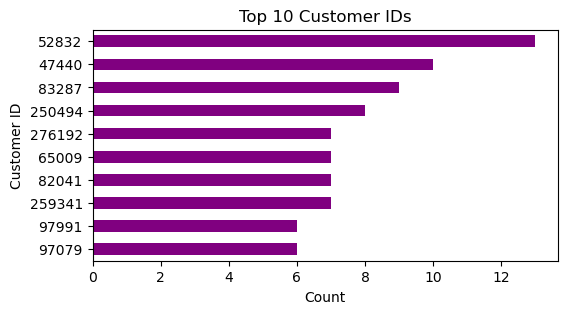

In [18]:
# Calculate the order count for each customer
order_counts = foodhub["customer_id"].value_counts()

# Sort the order counts in descending order
order_counts_sorted = order_counts.head(10).sort_values(ascending=True)

# Plot horizontal bar chart for customer ID counts
plt.figure(figsize=(6, 3))
order_counts_sorted.plot.barh(color="purple")
plt.xlabel('Count')
plt.ylabel('Customer ID')
plt.title('Top 10 Customer IDs')
plt.show()

### **Observation**
#### The customer_id column shows 1200 customers have ordered just once from the app, while 698 customers have ordered more than once. customer_id 52832 had the highest number of orders with 13 orders.

#### Restaurant name

In [19]:
#Check for number of restaurants registered in the app
print("Number of restaurants registered with Foodhub:", len(foodhub["restaurant_name"].unique()))

Number of restaurants registered with Foodhub: 178


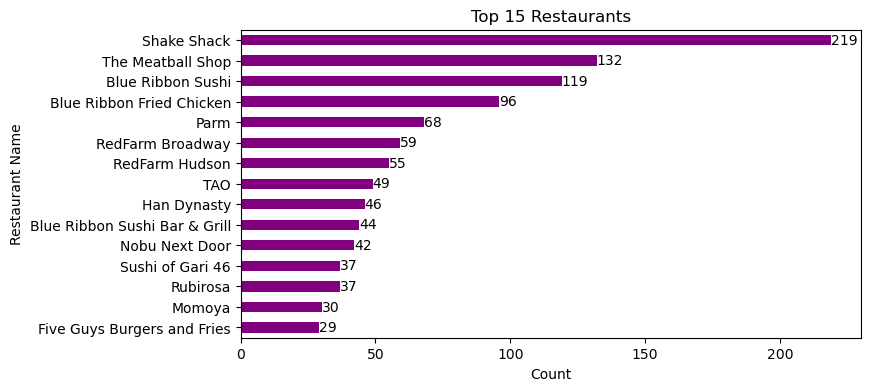

In [20]:
# Calculate the order count for each restaurant
order_counts = foodhub["restaurant_name"].value_counts()

# Sort the order counts in descending order
order_counts_sorted = order_counts.head(15).sort_values(ascending=True)

# Plot horizontal bar chart for order counts
plt.figure(figsize=(8, 4))
ax = order_counts_sorted.plot.barh(color="purple")
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.title('Top 15 Restaurants')

# Add data values to each bar
for i, count in enumerate(order_counts_sorted):
    ax.text(count, i, str(count), ha='left', va='center')

plt.show()

### **Observation**
#### 178 Restaurants are registered in the Foodhub app. Shake Shack is the most patronised restaurant, followed by the meatball shop. The top seven restaurant were patronised more than 50 times.

#### Cuisine type

In [21]:
foodhub['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

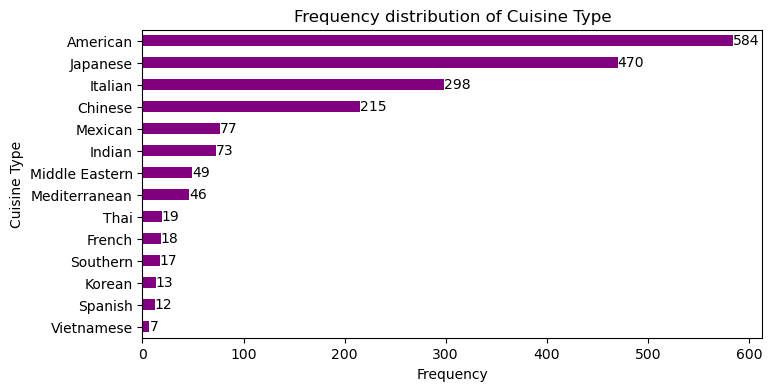

In [22]:
# Calculate the order count for each cuisine
cuisine_counts = foodhub["cuisine_type"].value_counts()

# Sort the cuisine counts in descending order
cuisine_counts_sorted = cuisine_counts.head(14).sort_values(ascending=True)

# Plot horizontal bar chart for cuisine counts
plt.figure(figsize=(8, 4))
ax = cuisine_counts_sorted.plot.barh(color="purple")
plt.xlabel('Frequency')
plt.ylabel('Cuisine Type')
plt.title('Frequency distribution of Cuisine Type')

# Add data values to each bar
for i, count in enumerate(cuisine_counts_sorted):
    ax.text(count, i, str(count), ha='left', va='center')

plt.show()

### **Observation**
#### There are 14 cuisine types offered by the app. The top 3 cuisine with the most number of orders is the American, Japanese and Italian cuisine respectively. The least ordered cuisine is the Vietnamese cuisine with 7 orders.

#### Cost of the order

In [26]:
# Find the minimum and maximum cost of orders
min_cost = foodhub["cost_of_the_order"].min()
max_cost = foodhub["cost_of_the_order"].max()
print("Minimum Cost of Order:", min_cost)
print("Maximum Cost of Order:", max_cost)

# Calculate the frequency of the minimum and maximum cost of orders
min_cost_freq = foodhub["cost_of_the_order"].value_counts()[min_cost]
max_cost_freq = foodhub["cost_of_the_order"].value_counts()[max_cost]
print("Frequency of minimum cost of order:", min_cost_freq)
print("Frequency of maximum cost of order:", max_cost_freq)

#Calculate the cost of order with the most frequency
    #Calculate the frequency of each cost value
cost_freq = foodhub["cost_of_the_order"].value_counts()
#Get the cost value with the highest frequency
most_frequent_cost = cost_freq.idxmax()
print("Cost of the order with the most frequency:", most_frequent_cost)

Minimum Cost of Order: 4.47
Maximum Cost of Order: 35.41
Frequency of minimum cost of order: 1
Frequency of maximum cost of order: 1
Cost of the order with the most frequency: 12.18


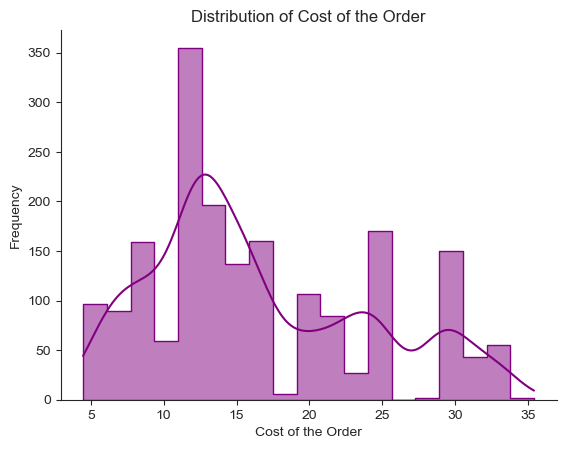

In [27]:
# Set the style to whitegrid (optional, for better aesthetics)
sns.set_style("ticks")

# Create the combination plot (line and bar chart) with shades of purple
sns.histplot(foodhub.cost_of_the_order, kde=True, color="purple", element="step")
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of the Order')

sns.despine()
plt.show()

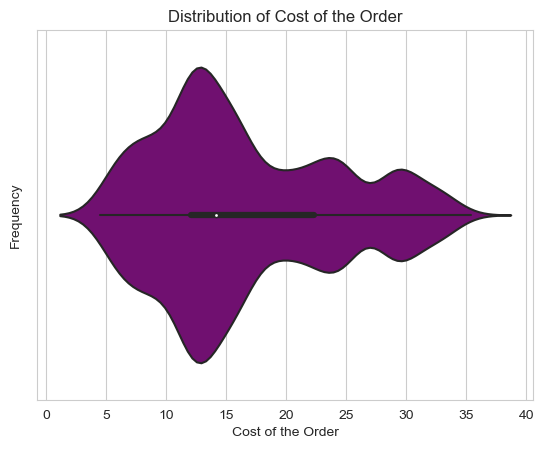

In [31]:
# A violin chart showing the distriution of cost of the order
sns.set_style("whitegrid")
sns.violinplot(x=foodhub['cost_of_the_order'], color="purple")
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of the Order')
plt.show()

### **Observation**
#### The above distribution depicts a right tailed distribution, which means nost of the distribution were concentrated in the lower boundary. Most of the values were between 10 and 15.

#### Day of the week

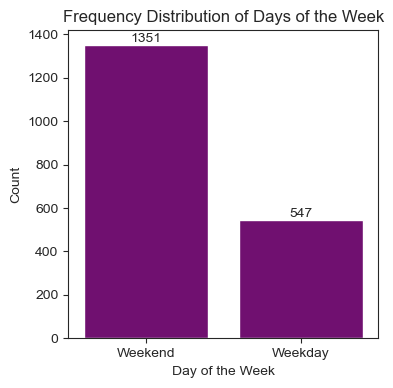

In [30]:
# Countplot
day_of_week_counts = foodhub["day_of_the_week"].value_counts()

plt.figure(figsize=(4, 4))
sns.set_style("ticks")
sns.countplot(data=foodhub, x="day_of_the_week", color="purple")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Frequency Distribution of Days of the Week")

# Add data values to each bar
for i, count in enumerate(day_of_week_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

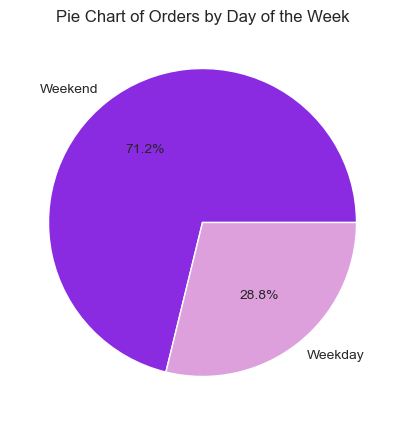

In [32]:
# Pie Chart to get the percentage distribution of day of the week
plt.figure(figsize=(5, 5))

# Define shades of purple colors
colors = ['#8A2BE2', '#DDA0DD']

foodhub["day_of_the_week"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=colors)

plt.title("Pie Chart of Orders by Day of the Week")
plt.ylabel("")
plt.show()

### **Observation**
#### The above shows that more orders took place on the weekend, accounting for 71% (1351), while fewer orders were placed on weekdays, representing 29% (547).

#### Rating

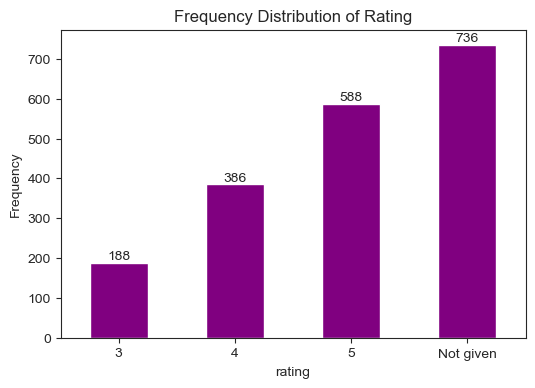

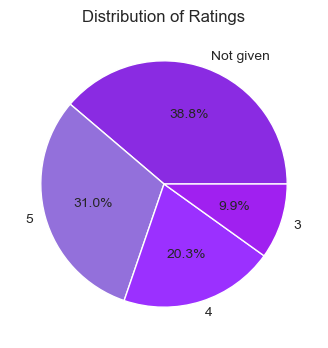

In [34]:
# Calculate the order count for each rating
rating_counts = foodhub["rating"].value_counts()

# Sort the rating counts in descending order
rating_counts_sorted = rating_counts.head().sort_values(ascending=True)

# Plot vertical bar chart for rating counts
plt.figure(figsize=(6, 4))
sns.set_style("ticks")
ax = rating_counts_sorted.plot.bar(color="purple")
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Rating')

# Add data values to each bar
for i, count in enumerate(rating_counts_sorted):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotate x-labels to 0 degrees
plt.show()

# Pie Chart for rating
plt.figure(figsize=(4, 4))
# Define shades of purple colors
colors = ['#8A2BE2', '#9370DB', '#9B30FF', '#A020F0', '#BA55D3', '#D8BFD8', '#DDA0DD']

foodhub["rating"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=colors)

plt.title("Distribution of Ratings")
plt.ylabel("")
plt.show()

### **Observation**
#### The above shows that most of the records were not given. Not given amounted to 38.8%. The least rating is 3 with 9.9%, while the highest rating 5 has 31%.

#### Food Preparation time

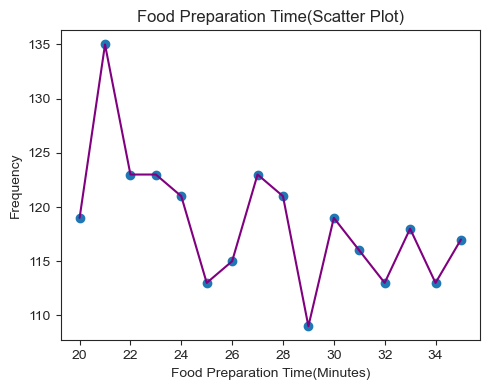

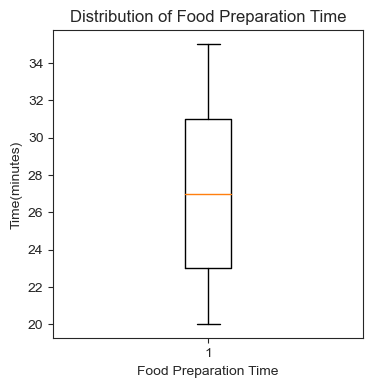

In [39]:
# Create a line chart of the preparation time
preparation_time = foodhub["food_preparation_time"].value_counts()

# Sort the data by x-axis values
preparation_time_sorted = preparation_time.sort_index()

# Set the figure size
plt.figure(figsize=(5,4))

# Plot the scatter plot
plt.scatter(preparation_time_sorted.index, preparation_time_sorted.values)

# Plot a line connecting the scatter plot points
plt.plot(preparation_time_sorted.index, preparation_time_sorted.values, linestyle='-', color='purple')

# Set the labels and title
plt.xlabel('Food Preparation Time(Minutes)')
plt.ylabel('Frequency')
plt.title('Food Preparation Time(Scatter Plot)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

# Create a box plot to show the distribution of food preparation time
plt.figure(figsize=(4, 4))
plt.boxplot(foodhub['food_preparation_time'])
plt.xlabel('Food Preparation Time')
plt.ylabel('Time(minutes)')
plt.title('Distribution of Food Preparation Time')
plt.show()

### **Observation**
#### The chart above shows that the most ordered food had a preparation time of 21 minutes. The interquartile range,  25% to 75% of the data, falls between 23 and 31 minutes.

#### Delivery time

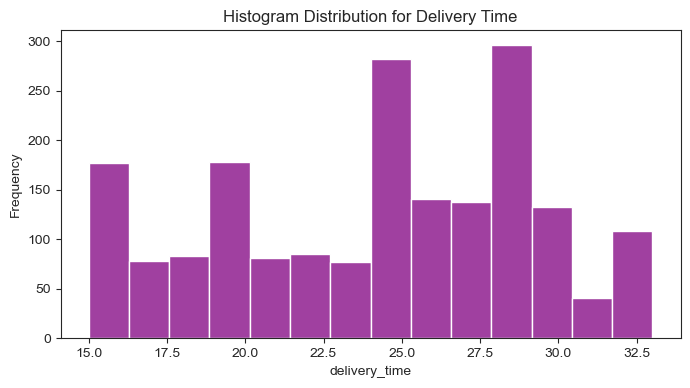

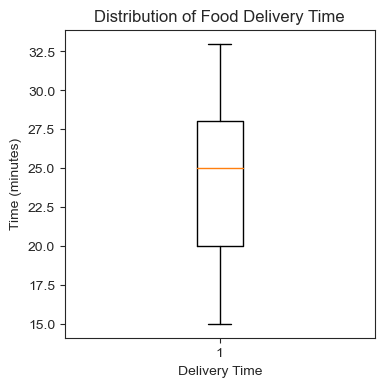

In [41]:
#Plot a histogram for delivery time
plt.figure(figsize=(8, 4))
sns.histplot(data=foodhub, x="delivery_time", color="purple")
plt.xlabel("delivery_time")
plt.ylabel("Frequency")
plt.title("Histogram Distribution for Delivery Time")
plt.show()

# Create a box plot to show the distribution of delivery time
plt.figure(figsize=(4, 4))
plt.boxplot(foodhub['delivery_time'])
plt.xlabel('Delivery Time')
plt.ylabel('Time (minutes)')
plt.title('Distribution of Food Delivery Time')
plt.show()

### **Observation**
#### The chart above shows that the most ordered food had a delivery time of 22.5 minutes to 30 minutes. The interquartile range, which represents 25% to 75% of the data, falls between 20 and 27.5 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [42]:
foodhub["restaurant_name"].value_counts().head(5).rename_axis('Restaurant Name').reset_index(name='Orders Received')

,Restaurant Name,Orders Received
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


### **Observation**
#### The table above shows the top five restaurants. The Shake Shack restaurant received the most orders, followed by the Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm respectively. 

### **Question 8**: Which is the most popular cuisine on weekends?

In [43]:
# Records for only weekend orders
weekend_orders = foodhub[foodhub["day_of_the_week"]=="Weekend"]

# The most popular cusisine on weekends
weekend_orders["cuisine_type"].value_counts().head(1).rename_axis('Cuisine Name').reset_index(name='Orders Received')

,Cuisine Name,Orders Received
0,American,415


### **Observation**
#### The table above shows that the most popular cuisine on weekends. Which is the ***American*** cuisine 

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [44]:
# Calculate the total number of orders
total_num_orders = len(foodhub)

# Calculate the number of orders greater than $20
num_orders_greater_than_20 = len(foodhub[foodhub["cost_of_the_order"] > 20])

# Calculate the percentage
percentage = (num_orders_greater_than_20 / total_num_orders) * 100

print("Percentage of orders greater than $20: {:.2f}%".format(percentage))

Percentage of orders greater than $20: 29.24%


### **Question 10**: What is the mean order delivery time?

In [46]:
# Calculate the mean order delivery time
mean_delivery_time = foodhub["delivery_time"].mean()

# Round the mean order delivery time to the nearest whole number
mean_delivery_time  = round(mean_delivery_time)

print("Mean Order Delivery Time:", mean_delivery_time, "minutes")

Mean Order Delivery Time: 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [47]:
# Getting the top 3 most frequent customers
foodhub['customer_id'].value_counts().head(3).rename_axis('Customer_id').reset_index(name='Number_of_orders')

,Customer_id,Number_of_orders
0,52832,13
1,47440,10
2,83287,9


### **Observation**
#### The table above shows that the top 3 customers are customers with id ***52832***, ***47440*** and ***83287*** with total orders of 13, 10 and 9 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

- ### **Cuisine vs Cost of the order**

In [48]:
foodhub['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [50]:
# Anova statistics to understand the significant difference between the average cost across all the cuisines
cuisines = ['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
            'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
            'French', 'Spanish', 'Vietnamese']

cuisine_data = []  # List to store cuisine-specific data arrays

for cuisine in cuisines:
    cuisine_data.append(foodhub[foodhub['cuisine_type'] == cuisine]['cost_of_the_order'])

f_statistic, p_value = stats.f_oneway(*cuisine_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 1.5187920067713478
P-value: 0.10297914806289048


### **Observation**
#### The non-significant difference in the mean cost of the order across cuisine types suggests that the restaurant has priced its menu items reasonably, allowing for a diverse range of cuisines to be offered. It is recommended for the restaurant to focus on menu planning based on customer preferences while considering additional factors such as customer feedback and market segmentation for more targeted pricing strategies.

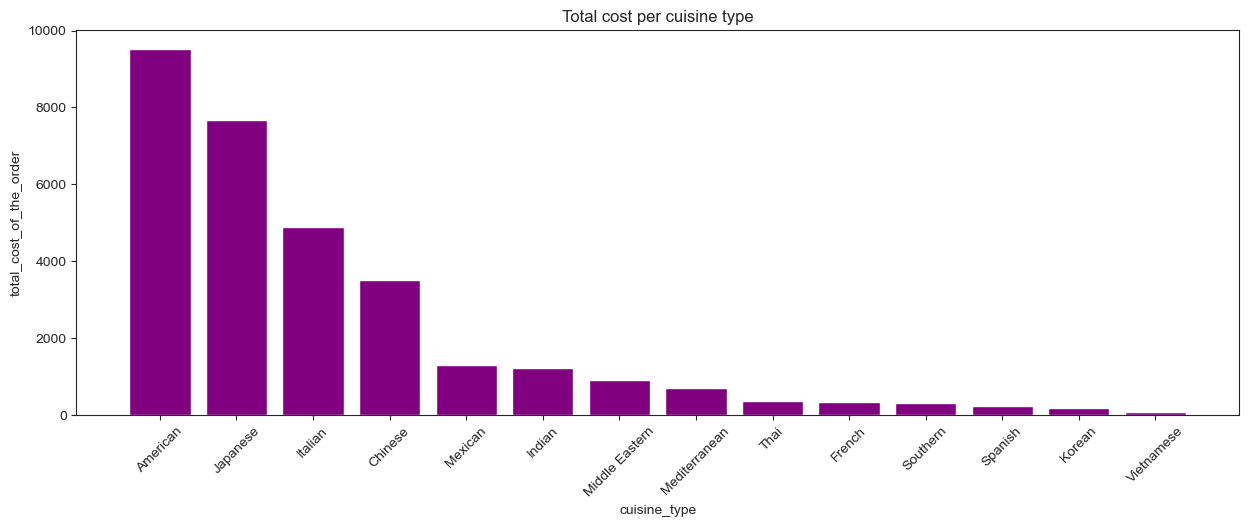

In [57]:
# a column chart to show the total cost by cuisine
plt.figure(figsize=(15, 5))
cuisine_order_cost = foodhub.groupby(by="cuisine_type").agg("sum")[["cost_of_the_order"]].reset_index().sort_values(by="cost_of_the_order", ascending=False)
plt.bar(cuisine_order_cost["cuisine_type"], cuisine_order_cost["cost_of_the_order"], color = "purple")
plt.title("Total cost per cuisine type")
plt.xticks(rotation=45)

# giving X and Y labels
plt.xlabel("cuisine_type")
plt.ylabel("total_cost_of_the_order")
     
# visualizing the plot
plt.show()

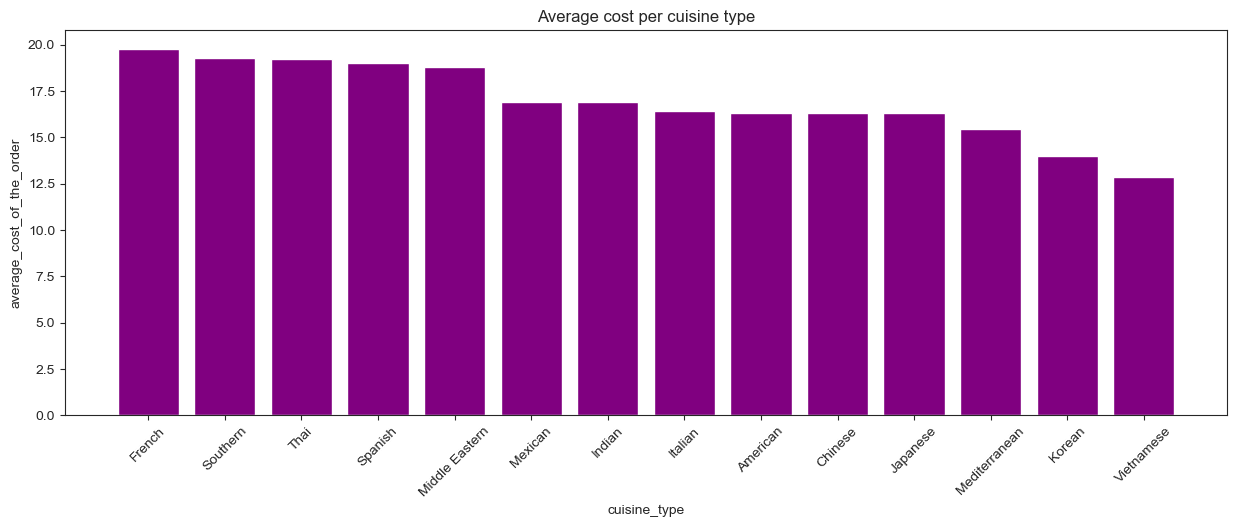

In [58]:
# a column chart to show the average cost by cuisine
cuisine_avg_cost = foodhub.groupby(by="cuisine_type").agg("mean")[["cost_of_the_order"]].reset_index().sort_values(by="cost_of_the_order", ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(cuisine_avg_cost["cuisine_type"], cuisine_avg_cost["cost_of_the_order"], color = "purple")
plt.title("Average cost per cuisine type")
plt.xticks(rotation=45)

# giving X and Y labels
plt.xlabel("cuisine_type")
plt.ylabel("average_cost_of_the_order")
     
# visualizing the plot
plt.show()

### **Observation**
#### While cuisine type may not significantly influence the average cost of the order according to the ANOVA analysis, the chart above suggest that there are differences in revenue generation and customer spending patterns among the cuisine types with American and Japansese cuisine being the highest total cost of the order.  However, the chart above highlights cuisine types like French and Southern with relatively higher average costs compared to Vietnamese cuisine, which has the lowest average cost and lowest total cost of the order.


- ### **Cuisine vs Food Preparation time**

In [59]:
# Anova statistics to check for significant difference between the average preparation time across all the cuisines
cuisines = ['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
            'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
            'French', 'Spanish', 'Vietnamese']

cuisine_data = []  # List to store cuisine-specific data arrays

for cuisine in cuisines:
    cuisine_data.append(foodhub[foodhub['cuisine_type'] == cuisine]['food_preparation_time'])

f_statistic, p_value = stats.f_oneway(*cuisine_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.5759803592089381
P-value: 0.8748929883169041


### **Observation**
#### The ANOVA result, with an F-statistic of 0.576 and a non-significant p-value of 0.875, suggests that there are no significant differences in food preparation time among the cuisine types. Based on this finding, it is recommended to focus on other factors that may influence food preparation time, such as cooking techniques and kitchen workflow.

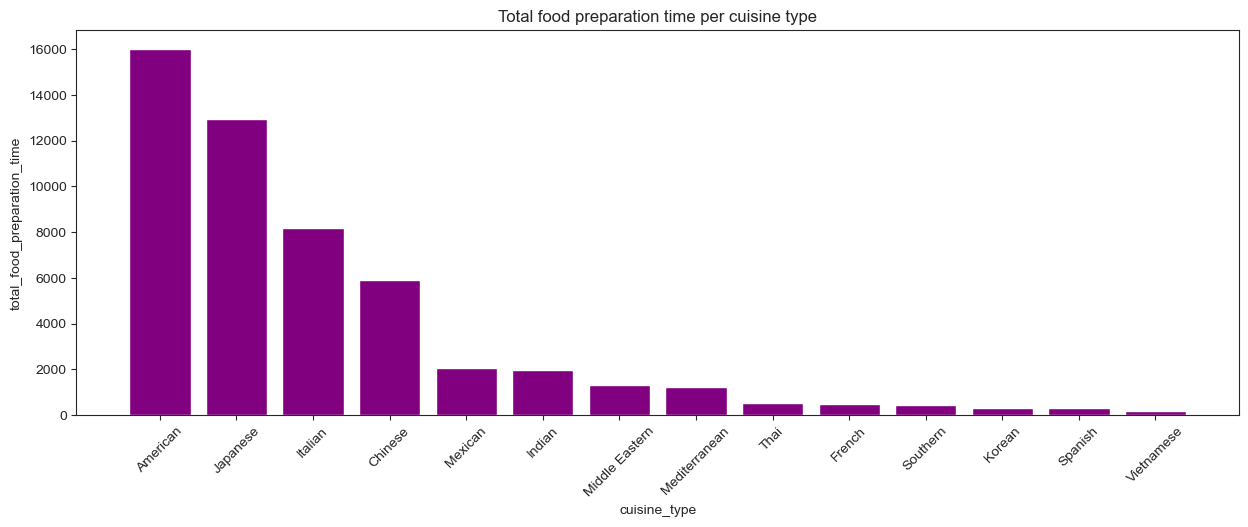

In [60]:
# a column chart to show the total preparation time by cuisine
cuisine_preparation_time = foodhub.groupby(by="cuisine_type").agg("sum")[["food_preparation_time"]].reset_index().sort_values(by="food_preparation_time", ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(cuisine_preparation_time["cuisine_type"], cuisine_preparation_time["food_preparation_time"], color = "purple")
plt.title("Total food preparation time per cuisine type")
plt.xticks(rotation=45)

# giving X and Y labels
plt.xlabel("cuisine_type")
plt.ylabel("total_food_preparation_time")
     
# visualizing the plot
plt.show()

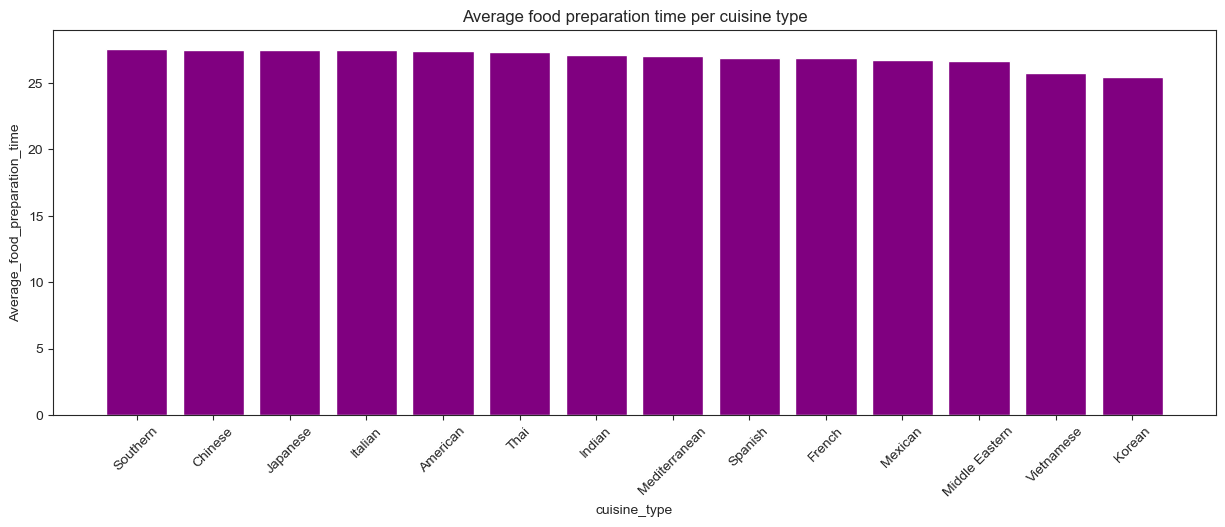

In [61]:
# a column chart to show the average preparation time by cuisine
cuisine_preparation_time = foodhub.groupby(by="cuisine_type").agg("mean")[["food_preparation_time"]].reset_index().sort_values(by="food_preparation_time", ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(cuisine_preparation_time["cuisine_type"], cuisine_preparation_time["food_preparation_time"], color = "purple")
plt.title("Average food preparation time per cuisine type")
plt.xticks(rotation=45)

# giving X and Y labels
plt.xlabel("cuisine_type")
plt.ylabel("Average_food_preparation_time")
     
# visualizing the plot
plt.show()

### **Observation**
#### We were able to further prove that AMERICA is indeed the most ordered cuisine from the first chart because it had the highest sum of cooking time. Despite no significant differences in food preparation time among cuisine types according to the ANOVA analysis, the restaurant can still benefit from the provided information. It is recommended to prioritize cuisines with higher average and total preparation times, like Southern, Chinese, and Japanese. This involves streamlining kitchen workflow, training staff in efficient preparation techniques, and managing ingredients and equipment effectively to reduce preparation time without compromising quality.

- ###  **Day of the Week vs Delivery time**

In [62]:
foodhub['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [63]:
# Separate the delivery times for weekdays and weekends
weekday_delivery_time = foodhub[foodhub['day_of_the_week'] == 'Weekday']['delivery_time']
weekend_delivery_time = foodhub[foodhub['day_of_the_week'] == 'Weekend']['delivery_time']

# Perform Mann-Whitney U Test
statistic, p_value = stats.mannwhitneyu(weekday_delivery_time, weekend_delivery_time, alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U Statistic: 619729.5
P-value: 6.697063906356841e-119


### **Observation**
#### The analysis indicates a significant difference in delivery times between weekdays and weekends, supported by a small p-value. This suggests that the day of the week has a meaningful impact on delivery time. Orders placed on weekends may have significantly different delivery times compared to weekdays.

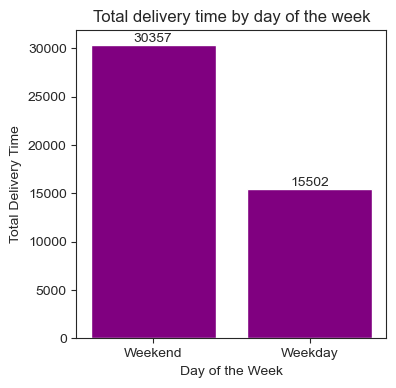

In [67]:
# a column chart to show the total deivery time by day of the week
day_of_week_delivery_time = foodhub.groupby(by="day_of_the_week").agg("sum")[["delivery_time"]].reset_index().sort_values(by="delivery_time", ascending=False)
plt.figure(figsize=(4, 4))
ax = plt.bar(day_of_week_delivery_time["day_of_the_week"], day_of_week_delivery_time["delivery_time"], color="purple")
plt.title("Total delivery time by day of the week")
plt.xticks(rotation=0)
plt.xlabel("Day of the Week")
plt.ylabel("Total Delivery Time")

# Add data labels to each bar
for i, v in enumerate(day_of_week_delivery_time["delivery_time"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

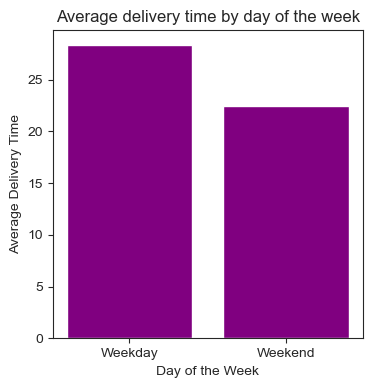

In [65]:
# a column chart to show the average deivery time by day of the week(dow)
avg_dow_delivery_time = foodhub.groupby(by="day_of_the_week").agg("mean")[["delivery_time"]].reset_index().sort_values(by="delivery_time", ascending=False)
plt.figure(figsize=(4, 4))
plt.bar(avg_dow_delivery_time["day_of_the_week"], avg_dow_delivery_time["delivery_time"], color="purple")
plt.title("Average delivery time by day of the week")
plt.xticks(rotation=0)
plt.xlabel("Day of the Week")
plt.ylabel("Average Delivery Time")

plt.show()

### **Observation**
#### The analysis indicates that there is a significant difference in delivery times between weekdays and weekends. The average delivery time on weekends is lower than on weekdays, and the restaurant handles higher order volumes on weekends. To optimize operations, the restaurant should allocate additional resources during peak weekend hours, optimize operations on weekdays, while also monitoring and adjusting delivery capacity to meet increased demand.

- ### **Day of the Week vs Food Preparation time**

In [66]:
# Separate the delivery times for weekdays and weekends
weekday_preparation_time = foodhub[foodhub['day_of_the_week'] == 'Weekday']['food_preparation_time']
weekend_preparation_time = foodhub[foodhub['day_of_the_week'] == 'Weekend']['food_preparation_time']

# Perform Mann-Whitney U Test
statistic, p_value = stats.mannwhitneyu(weekday_preparation_time, weekend_preparation_time, alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U Statistic: 359077.5
P-value: 0.3342952915631411


### **Observation**
#### The food preparation time in the restaurant is similar regardless of whether it is a weekday or a weekend. This analysis indicates no significant difference in preparation times between weekdays and weekends, supported by a large p-value.

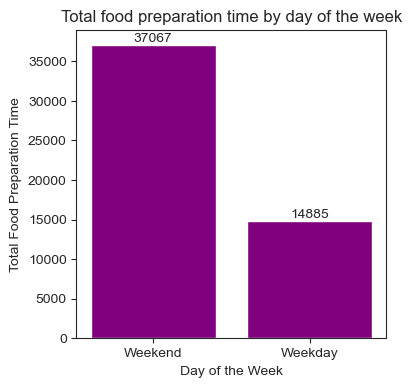

In [68]:
# a column chart to show the total preparation time by day of the week(dow)
dow_preparation_time = foodhub.groupby(by="day_of_the_week").agg("sum")[["food_preparation_time"]].reset_index().sort_values(by="food_preparation_time", ascending=False)

plt.figure(figsize=(4, 4))
ax = plt.bar(dow_preparation_time["day_of_the_week"], dow_preparation_time["food_preparation_time"], color="purple")
plt.title("Total food preparation time by day of the week")
plt.xticks(rotation=0)
plt.xlabel("Day of the Week")
plt.ylabel("Total Food Preparation Time")

# Add data labels to each bar
for i, v in enumerate(dow_preparation_time["food_preparation_time"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

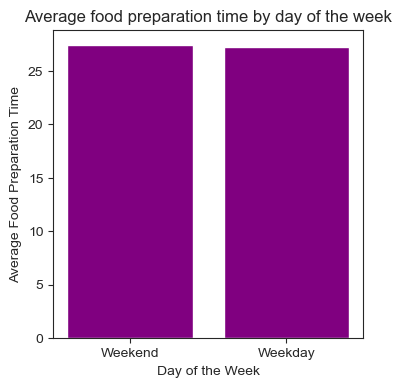

In [69]:
# a column chart to show the average preparation time by day of the week(dow)
dow_preparation_time = foodhub.groupby(by="day_of_the_week").agg("mean")[["food_preparation_time"]].reset_index().sort_values(by="food_preparation_time", ascending=False)

plt.figure(figsize=(4, 4))
plt.bar(dow_preparation_time["day_of_the_week"], dow_preparation_time["food_preparation_time"], color="purple")
plt.title("Average food preparation time by day of the week")
plt.xticks(rotation=0)
plt.xlabel("Day of the Week")
plt.ylabel("Average Food Preparation Time")

plt.show()

### **Observation**
#### The analysis suggests that there is no significant difference in food preparation times between weekdays and weekends. The small variation in average preparation times (27.44 minutes on weekends vs. 27.21 minutes on weekdays) indicate consistent food preparation efficiency throughout the week. The total preparation times reaffirms that more orders are placed on the weekend. Based on these findings, the restaurant can allocate resources and plan operations efficiently, as the day of the week does not have a significant impact on food preparation times.

- ### **Rating vs Delivery time**

In [70]:
foodhub['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [71]:
# Split the dataset into separate groups based on the rating categories
group_not_given = foodhub.loc[foodhub['rating'] == 'Not given', 'delivery_time']
group_5 = foodhub.loc[foodhub['rating'] == '5', 'delivery_time']
group_3 = foodhub.loc[foodhub['rating'] == '3', 'delivery_time']
group_4 = foodhub.loc[foodhub['rating'] == '4', 'delivery_time']

# Perform the ANOVA test
statistic, p_value = stats.f_oneway(group_not_given, group_5, group_3, group_4)

# Print the test statistic and p-value
print('ANOVA Test Statistic:', statistic)
print('P-value:', p_value)

ANOVA Test Statistic: 0.8701066387374108
P-value: 0.45587699474940024


### **Observation**
#### The p-value of 0.4559 indicates no significant difference in delivery time among the rating categories. The ANOVA analysis shows that rating categories (Not given, 5, 3, 4) do not significantly impact delivery time. The restaurant's delivery time appears unaffected by the rating categories provided by customers.

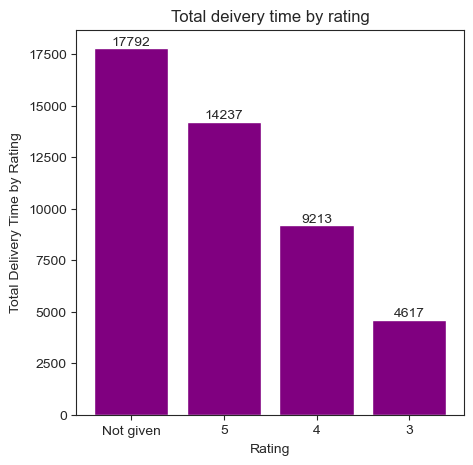

In [72]:
# A column chart to show the total delivery time by rating
rating_by_delivery_time = foodhub.groupby(by="rating").agg("sum")[["delivery_time"]].reset_index().sort_values(by="delivery_time", ascending=False)

plt.figure(figsize=(5, 5))
ax = plt.bar(rating_by_delivery_time["rating"], rating_by_delivery_time["delivery_time"], color="purple")
plt.title("Total deivery time by rating")
plt.xticks(rotation=0)
plt.xlabel("Rating")
plt.ylabel("Total Delivery Time by Rating")

# Add data labels to each bar
for i, v in enumerate(rating_by_delivery_time["delivery_time"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

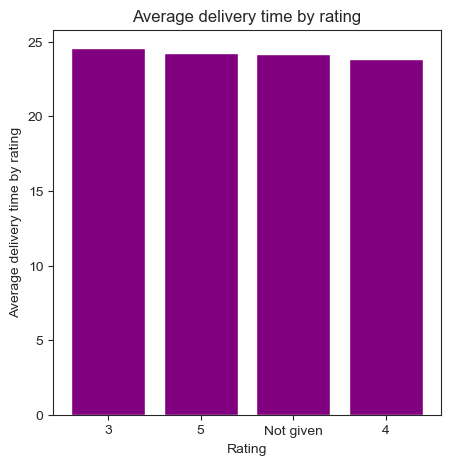

In [73]:
# A column chart to show the average delivery time by rating
rating_by_delivery_time = foodhub.groupby(by="rating").agg("mean")[["delivery_time"]].reset_index().sort_values(by="delivery_time", ascending=False)

plt.figure(figsize=(5, 5))
plt.bar(rating_by_delivery_time["rating"], rating_by_delivery_time["delivery_time"], color="purple")
plt.title("Average delivery time by rating")
plt.xticks(rotation=0)
plt.xlabel("Rating")
plt.ylabel("Average delivery time by rating")

plt.show()

### **Observation**
#### The analysis suggests that there is no significant difference in delivery time among different rating categories, indicating that the restaurant provides consistent delivery service. To enhance customer satisfaction, the restaurant should focus on overall service quality, address customer feedback, and continuously improve the delivery process.

- ### **Rating vs Cost of the order**

In [74]:
# Split the dataset into separate groups based on the rating categories
group_not_given = foodhub.loc[foodhub['rating'] == 'Not given', 'cost_of_the_order']
group_5 = foodhub.loc[foodhub['rating'] == '5', 'cost_of_the_order']
group_3 = foodhub.loc[foodhub['rating'] == '3', 'cost_of_the_order']
group_4 = foodhub.loc[foodhub['rating'] == '4', 'cost_of_the_order']

# Perform the ANOVA test
statistic, p_value = stats.f_oneway(group_not_given, group_5, group_3, group_4)

# Print the test statistic and p-value
print('ANOVA Test Statistic:', statistic)
print('P-value:', p_value)

ANOVA Test Statistic: 1.701273788696363
P-value: 0.1647388981195804


### **Observation**
#### The analysis indicates that there is no significant relationship between customer ratings and the cost of the order, suggesting that the restaurant's pricing strategy does not need to be influenced by customer ratings alone.

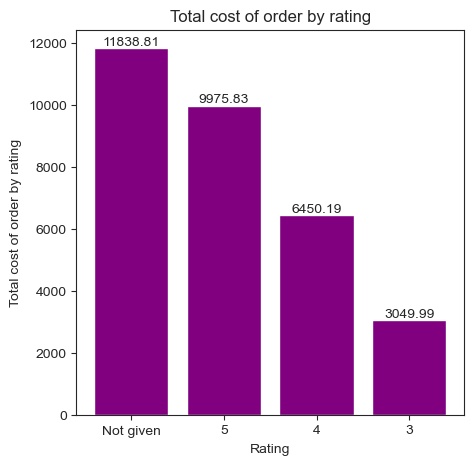

In [76]:
# A column chart to show the total cost of order by rating
rating_by_cost_of_order = foodhub.groupby(by="rating").agg("sum")[["cost_of_the_order"]].reset_index().sort_values(by="cost_of_the_order", ascending=False)

plt.figure(figsize=(5, 5))
ax = plt.bar(rating_by_cost_of_order["rating"], rating_by_cost_of_order["cost_of_the_order"], color="purple")
plt.title("Total cost of order by rating")
plt.xticks(rotation=0)
plt.xlabel("Rating")
plt.ylabel("Total cost of order by rating")

# Add data labels to each bar
for i, v in enumerate(rating_by_cost_of_order["cost_of_the_order"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

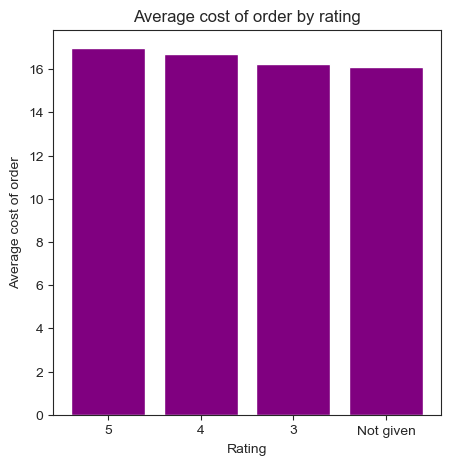

In [77]:
# A column chart to show the average cost of order by rating
rating_by_cost_of_order = foodhub.groupby(by="rating").agg("mean")[["cost_of_the_order"]].reset_index().sort_values(by="cost_of_the_order", ascending=False)

plt.figure(figsize=(5, 5))
plt.bar(rating_by_cost_of_order["rating"], rating_by_cost_of_order["cost_of_the_order"], color="purple")
plt.title("Average cost of order by rating")
plt.xticks(rotation=0)
plt.xlabel("Rating")
plt.ylabel("Average cost of order")

plt.show()

### **Observation**
#### The average cost of the order varies slightly across rating categories, with the highest average cost observed for a rating of 5 (16.97) and the lowest for 'Not given' ratings (16.08). Additionally, there is a noticeable difference in the total cost of the order among rating categories, with the highest total cost observed for 'Not given' ratings (11,838.81) and the lowest for a rating of 3 (3,049.99). The ANOVA test indicates that there is no statistically significant difference in the average cost of the order among the rating categories, as the p-value (0.1647) is greater than the significance level of 0.05.  Although there is no significant difference in the average cost of the order based on ratings, the restaurant should still focus on enhancing overall customer experience and satisfaction.

#### Correlation among variables

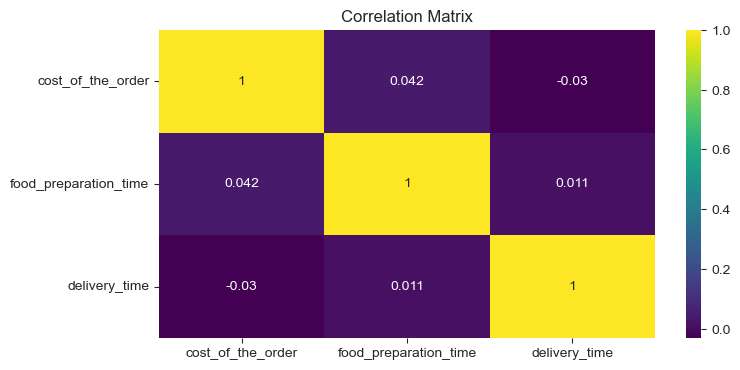

In [79]:
#Select the variables for correlation analysis for numerical variable
variables = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
  #Create a subset of the dataframe with selected variables
subset_df = foodhub[variables]
  #Calculate the correlation matrix
correlation_matrix = subset_df.corr()
  #Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

### **Observation**
#### The above correlation matrix shows that there is a weak inverse relationship between delivery time and cost of the order. Food preparation time have a weak positive relationship with cost of order and delivery time.

In [80]:
# find the cramer correlation between cuisine type and customer id 
# Create a contingency table
contingency_table = pd.crosstab(foodhub['cuisine_type'], foodhub['customer_id'])

# Calculate the Cramer's V statistic 
def cramers_v(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_value = cramers_v(contingency_table)

# Print the Cramer's V correlation coefficient
print("Cramer's V correlation coefficient:", cramers_v_value)

Cramer's V correlation coefficient: 0.41724005684623805


### **Observation**
#### The above correlation coefficient shows there is 42% correlation between customer id and Cuisine type.

In [81]:
# find the cramer correlation between cuisine type and restaurant
# Create a contingency table
contingency_table = pd.crosstab(foodhub['cuisine_type'], foodhub['restaurant_name'])

# Calculate the Cramer's V statistic
def cramers_v(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_value = cramers_v(contingency_table)

# Print the Cramer's V correlation coefficient
print("Cramer's V correlation coefficient:", cramers_v_value)

Cramer's V correlation coefficient: 0.9519925965058965


### **Observation**
#### The value of 0.9519925965058965, which is close to 1, suggests a high degree of relationship or association between the two variables.This result implies that the cuisine type is strongly related to the specific restaurant names in the dataset. It suggests that certain cuisine types are closely associated with particular restaurants, indicating that restaurants tend to specialize in specific types of cuisine.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [83]:
# Convert 'rating' column to numeric type
foodhub['rating'] = pd.to_numeric(foodhub['rating'], errors='coerce')

# Filter the data based on the conditions
promotional_restaurants = foodhub.groupby('restaurant_name').rating.agg(['count','mean']).reset_index()
promotional_restaurants[(promotional_restaurants[('count')] > 50) & (promotional_restaurants[('mean')] > 4)]

,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [84]:
# calculate the revenue of the restaurants that met the condition 
foodhub['revenue'] = foodhub['cost_of_the_order'].apply(lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0))
net_revenue = round(foodhub['revenue'].sum(),2)

# Print the net revenue
print("Net Revenue: $",net_revenue)

Net Revenue: $ 6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [85]:
# Calculate the total number of orders
total_orders = len(foodhub)

# Calculate the total delivery time by adding the food preparation time and delivery time
total_delivery_time = foodhub['food_preparation_time'] + foodhub['delivery_time']

# Calculate the number of orders that take more than 60 minutes for delivery
orders_more_than_60_minutes = len(foodhub[total_delivery_time > 60])

# Calculate the percentage of orders that take more than 60 minutes for delivery
percentage = (orders_more_than_60_minutes / total_orders) * 100

# Print the result
print("Percentage of orders taking more than 60 minutes to deliver: {:.2f}%".format(percentage))

Percentage of orders taking more than 60 minutes to deliver: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [86]:
# calculate the averages of delivery time by day of the week(dow)
mean_delivery_time_by_DOW = foodhub.groupby('day_of_the_week').agg('mean')[['delivery_time']].reset_index().sort_values(by='delivery_time', ascending=False)
mean_delivery_time_by_DOW

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


In [87]:
# Find the variance betweeen the averages of the delivery time
variance_delivery_time = mean_delivery_time_by_DOW.query("day_of_the_week=='Weekday'")["delivery_time"][0] - mean_delivery_time_by_DOW.query("day_of_the_week=='Weekend'")["delivery_time"][1]

print("The mean delivery time differs between weekdays and weekends by ",(round(variance_delivery_time,2)), "minutes")

The mean delivery time differs between weekdays and weekends by  5.87 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

## Conclusion
Foodhub is an online app company in New York that makes it easy for customers to order food from various restaurants and have it delivered to their doorstep. After analysing the dataset, it was found that there are 1898 orders from 1200 customers, with most customers not ordering frequently, and the highest number of orders placed by a single customer being 13. The top three customers eligible for 20% discount vouchers are identified as customers with ID 52832, 47440, and 83287, having placed 13, 10, and 9 orders, respectively.

The dataset contains information about 178 registered restaurants, with Shake Shack receiving the highest patronage of 219 orders. Among the 9 cuisine types, American and Japanese cuisines had the highest patronage at 30.8% and 24.8%, respectively, while Korean, Spanish, and Vietnamese cuisines had relatively low patronage, each below 15%.
The cost of orders ranged from 4.47 to 35.41 dollars, with a mean of 12.18 dollars, and most orders fell between 10 and 15 dollars.
Around 29.24% of orders had a cost exceeding $20. More orders were placed on weekends (71%) compared to weekdays (29%), with American cuisine being the most popular choice among customers for both weekdays and weekends.
Most customer ratings were either 4 or 5, constituting a little over 50% of the total ratings. The average food preparation time was 21 minutes, and the median and mean delivery times were 25 and 24 minutes, respectively, with a range of 15 to 32.5 minutes.

The statistical tests showed that there is no significant difference in the mean cost of orders among cuisine types, indicating reasonably priced menu items allowing for a diverse range of cuisines to be offered. Food preparation times did not significantly differ across cuisine types. However, there was a significant difference in delivery times between weekdays and weekends, with weekdays having higher average delivery times and handling more orders than weekends. There was no significant impact of customer ratings on food preparation times or delivery times.

Additionally, there was a positive relationship between the cost of the order and food preparation time, and between delivery time and food preparation time, though they were not very strong. A slight negative relationship was observed between delivery time and the cost of the order.

Furthermore, there was a medium relationship between customer ID and cuisine type, while a strong association was found between cuisine type and restaurant name. Four restaurants met the conditions for a promotional offer, namely Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.Foodhub is estimated to make 6166.3 dollars in revenue by charging restaurants 25% on orders exceeding 20 dollars and 15% on orders above 5 dollars. Approximately 80.87% of orders take more time than the average delivery and food preparation time, and 10.54% of orders take more than an hour to be delivered. The mean delivery time varies by 5 minutes and 52 seconds between weekdays and weekends.


## Recommendation

- Customer Ratings:
It is essential to encourage customers to give ratings for their orders. The company should emphasize the value of customer feedback and how it helps in improving the quality of service. Implementing a feedback system that incentivizes customers to rate their orders, such as offering discounts or rewards, can increase the participation rate and provide valuable insights for service improvement.

- Resource Allocation:
Since more orders were placed on weekends compared to weekdays, the company should strategically allocate additional resources during peak weekend hours. This could involve hiring extra staff, optimizing delivery routes, and ensuring efficient food preparation processes. Simultaneously, on weekdays, the company should focus on streamlining operations to ensure timely deliveries and customer satisfaction during these comparatively slower periods.

- Time Optimization:
Given that the average delivery time on weekdays is higher than on weekends, the company should identify bottlenecks in the delivery process and work towards optimizing delivery efficiency on weekdays. Similarly, the nearly similar food preparation time for weekends and weekdays should be taken advantage of by ensuring that the food preparation process is smooth and expedited during both periods to attract more customers on weekdays.

- Customer Patronage Strategy:
Identifying the customer who contributed the highest patronage presents an opportunity for the company to develop customer loyalty programs or personalized promotions for high-value customers. By recognizing and rewarding loyal customers, the company can encourage repeat business and increase customer retention.

- Cuisine Diversity:
Considering the high correlation between cuisine type and restaurant name, underperforming restaurants should explore expanding their menu to include popular cuisines like American and Japanese. This can attract a wider customer base and provide more options for customers with diverse preferences.

- Cost of Cuisines:
For cuisines such as French, Southern, Thai, and Spanish, which had higher average order costs despite lower order volumes, the company should collaborate with the respective restaurants to find ways to reduce the cost of these cuisines. Cost optimization could involve sourcing ingredients more efficiently, negotiating better deals with suppliers, or fine-tuning the menu to balance cost and customer demand.

By implementing these smart and relevant recommendations, FoodHub Company can enhance its services, improve customer satisfaction, and optimize its overall operations, leading to increased customer loyalty and business growth.